# Hashtag and Semantic Networks

In this notebook we generate some different bipartite networks on the subset of Bushfire tweets. We define actor nodes as being either Party or MP and document nodes as being either hashtags or words (unigrams).

In [3]:
#Necessary imports
import pandas as pd
import numpy as np
from tqdm import tqdm
import tweepy
from datetime import date
import pickle 
import time
from textnets import Corpus, Textnet
import matplotlib.pyplot as plt

## Preparing the Network

In [4]:
network_df = pd.read_csv("data/bushfire_subset.csv", index_col=0)

In [5]:
network_df["hashtags"] = network_df["hashtags"].apply(eval).apply(' '.join)
network_df["hashtags"] = network_df["hashtags"].str.split()
network_df["hashashtag"] = network_df["hashtags"].apply(lambda x: 1 if len(x) > 0 else 0)
hashtag_df = network_df.loc[network_df["hashashtag"] == 1].reset_index(drop = True)
hashtag_df = hashtag_df.explode("hashtags")
hashtag_df["party2"] = hashtag_df["party"]

## MP-Hashtag Network

In [276]:
#[w[1] for w in Counter(hashtags).items()]

In [289]:
hashtags = hashtag_df["hashtags"].tolist()
hashtags = [w[0] for w in Counter(hashtags).items() if w[1] >= 2]
mp_hashtag_df["top_hashtags"] = mp_hashtag_df["hashtags"].apply(lambda x: x if x in hashtags else np.nan)

In [8]:
#Prepare data for MP-Hashtag Network
mp_hashtag_df = hashtag_df.set_index("name")



mp_hashtag_corpus = Corpus.from_df(mp_hashtag_df, doc_col='hashtags', lang='en')
tn_mp_hashtag = Textnet(mp_hashtag_corpus.tokenized(stem = False, lower=False, remove_punctuation = False,
                                                    remove_numbers = False, remove_stop_words = False,
                                                    remove_urls = False), 
                        min_docs=1, doc_attrs=mp_hashtag_df[['party']].to_dict())

In [9]:
mp_hashtag_plot = tn_mp_hashtag.plot(label_term_nodes=True,
                                    label_doc_nodes=True,
                                    vertex_label_size = 6,
                                    vertex_color=['gray' if v['party'] is None 
                                                  else ('dodgerblue' if v['party'] == 'Liberal Party of Australia'
                                                  else ('indianred' if v['party'] == 'Australian Labor Party' 
                                                  else ('lightgreen' if v['party'] == 'Australian Greens' 
                                                  else ('gold' if v['party'] == 'The Nationals' 
                                                  else ('darkorange' if v['party'] == 'Center Alliance' 
                                                  else ('pink' if v['party'] == 'Liberal National Party of Queensland'
                                                  else  'purple'))))))
                                                  for v in tn_mp_hashtag.vs],
                                    vertex_shape=['none' if v['party'] is None 
                                                  else 'triangle' if v['party'] == 'Liberal Party of Australia'
                                                  else 'triangle-down'
                                                  for v in tn_mp_hashtag.vs],
                                    scale_nodes_by = 'degree')

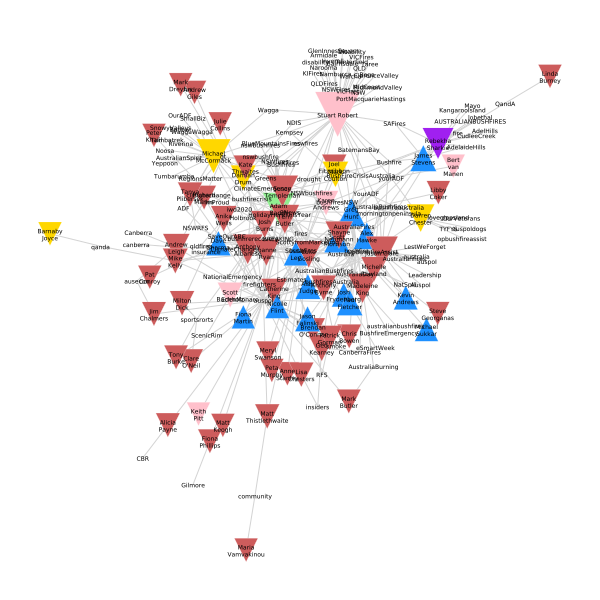

In [292]:
mp_hashtag_plot

In [11]:
print(tn_mp_hashtag.degree.sort_values(ascending=False)[:30].to_markdown())

|                   |   0 |
|:------------------|----:|
| Stuart Robert     |  66 |
| Michael McCormack |  44 |
| auspol            |  36 |
| Jason Clare       |  27 |
| bushfires         |  27 |
| Adam Bandt        |  25 |
| Susan Templeman   |  25 |
| Rebekha Sharkie   |  23 |
| bushfire          |  19 |
| Darren Chester    |  18 |
| Madeleine King    |  18 |
| Anthony Albanese  |  18 |
| Greg Hunt         |  17 |
| Terri Butler      |  16 |
| Luke Gosling      |  16 |
| Scott Buchholz    |  15 |
| Andrew Leigh      |  14 |
| Mark Coulton      |  13 |
| Josh Burns        |  12 |
| Damian Drum       |  11 |
| Alex Hawke        |  11 |
| Shayne Neumann    |  11 |
| BREAKING          |  10 |
| Jason Falinski    |   9 |
| James Stevens     |   9 |
| Ged Kearney       |   9 |
| Scott Morrison    |   8 |
| Anika Wells       |   8 |
| Joanne Ryan       |   8 |
| Estimates         |   8 |


## Party-Hashtag Network

In [12]:
#Prepare data for Party-Hashtag Network
party_hashtag_df = mp_hashtag_df.set_index("party2")
party_hashtag_corpus = Corpus.from_df(party_hashtag_df, doc_col='hashtags', lang='en')
tn_party_hashtag = Textnet(party_hashtag_corpus.tokenized(stem = False, lower=False, remove_punctuation = False,
                                                    remove_numbers = False, remove_stop_words = False,
                                                    remove_urls = False), min_docs=1, doc_attrs=party_hashtag_df[['party']].to_dict())

In [13]:
party_hashtag_plot = tn_party_hashtag.plot(label_term_nodes=True,
                                            label_doc_nodes=True,
                                            vertex_label_size=5,
                                            vertex_color=['lightgray' if v['party'] is None 
                                                          else ('dodgerblue' if v['party'] == 'Liberal Party of Australia'
                                                          else ('indianred' if v['party'] == 'Australian Labor Party' 
                                                          else ('lightgreen' if v['party'] == 'Australian Greens' 
                                                          else ('gold' if v['party'] == 'The Nationals' 
                                                          else ('darkorange' if v['party'] == 'Center Alliance' 
                                                          else ('pink' if v['party'] == 'Liberal National Party of Queensland'
                                                          else  'purple'))))))
                                                          for v in tn_party_hashtag.vs],
                                            vertex_shape=['none' if v['party'] is None 
                                                          else 'triangle' if v['party'] == 'Liberal Party of Australia'
                                                          else 'triangle-down'
                                                          for v in tn_party_hashtag.vs],
                                            scale_nodes_by = 'degree',
                                            dpi = 600)

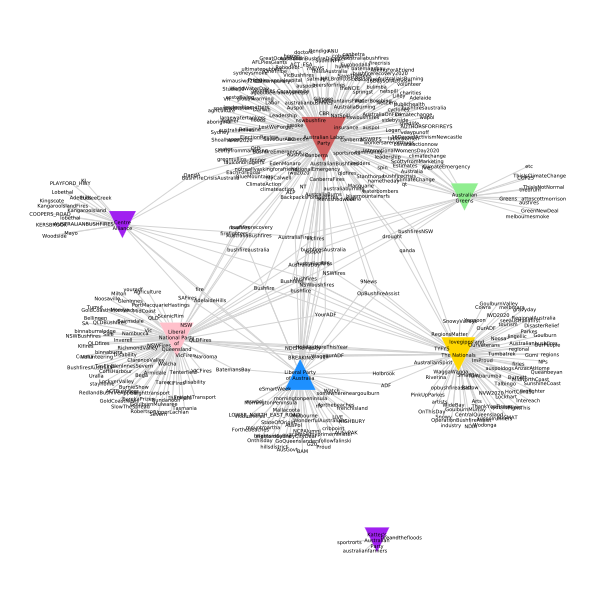

In [14]:
party_hashtag_plot#.save("hashtagplot.svg")

In [15]:
print(tn_party_hashtag.degree.sort_values(ascending=False)[:30].to_markdown())

|                                      |   0 |
|:-------------------------------------|----:|
| Australian Labor Party               | 177 |
| Liberal National Party of Queensland |  86 |
| The Nationals                        |  85 |
| Liberal Party of Australia           |  56 |
| Australian Greens                    |  25 |
| Centre Alliance                      |  23 |
| bushfires                            |   6 |
| Bushfire                             |   5 |
| NSWfires                             |   4 |
| NSWbushfires                         |   4 |
| YourADF                              |   4 |
| bushfire                             |   4 |
| AustraliaFires                       |   4 |
| auspol                               |   4 |
| bushfireaustralia                    |   3 |
| OpBushfireAssist                     |   3 |
| BREAKING                             |   3 |
| Bushfires                            |   3 |
| SAFires                              |   3 |
| Katter's Au

## Party-Semantic Network

In [16]:
network_df["party2"] = network_df["party"]
party_semantic_df = party_semantic_df.groupby('party', group_keys=False).apply(lambda x: x.sample(min(len(x), 300)))
party_semantic_df = network_df.set_index("party2")

NameError: name 'party_semantic_df' is not defined

In [17]:
vocab = ' '.join(party_semantic_df["final_text"].to_list()).split()
top_w = [w[0] for w in Counter(vocab).items() if w[1] >= 30]

NameError: name 'party_semantic_df' is not defined

In [332]:
party_semantic_df["top_words"] = party_semantic_df["final_text"].apply(lambda txt: ' '.join([w for w in txt.split() if w in top_w]))

In [333]:
party_semantic_corpus = Corpus.from_df(party_semantic_df, doc_col='top_words', lang='en')

In [334]:
tn_party_semantic = Textnet(party_semantic_corpus.tokenized(stem = False, lower=False, remove_punctuation = False,
                                                            remove_numbers = False, remove_stop_words = False,
                                                            remove_urls = False), min_docs=1, doc_attrs=party_semantic_df[['party']].to_dict())

In [335]:
plot_party_semantic = tn_party_semantic.plot(label_term_nodes=True,
                                             label_doc_nodes=True,
                                             vertex_label_size=4,
                                             vertex_color=['gray' if v['party'] is None 
                                                              else ('dodgerblue' if v['party'] == 'Liberal Party of Australia'
                                                              else ('indianred' if v['party'] == 'Australian Labor Party' 
                                                              else ('lightgreen' if v['party'] == 'Australian Greens' 
                                                              else ('gold' if v['party'] == 'The Nationals' 
                                                              else ('darkorange' if v['party'] == 'Center Alliance' 
                                                              else ('pink' if v['party'] == 'Liberal National Party of Queensland'
                                                              else  'purple'))))))
                                                              for v in tn_party_semantic.vs],
                                               vertex_shape=['none' if v['party'] is None 
                                                              else 'triangle' if v['party'] == 'Liberal Party of Australia'
                                                              else 'triangle-down'
                                                              for v in tn_party_semantic.vs])

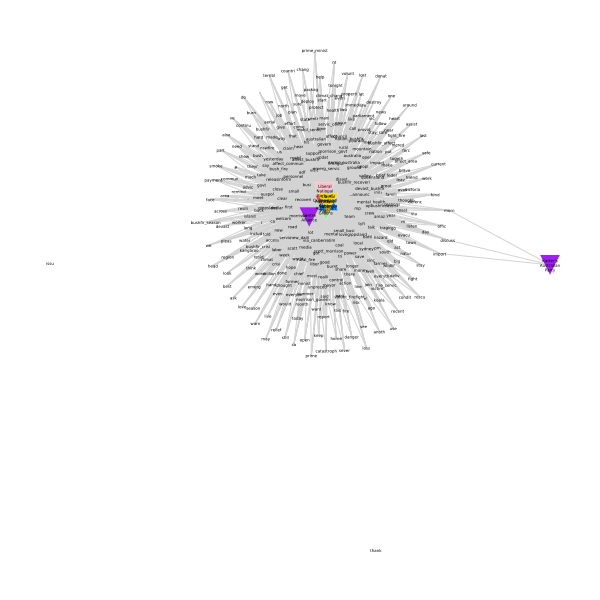

In [336]:
plot_party_semantic

In [252]:
words = tn_party_semantic.project(node_type='term')
#words.plot(label_nodes=True,
#           show_clusters=False)

## MP-Semantic Network

In [18]:
mp_semantic_df = network_df.set_index("name")
mp_semantic_corpus = Corpus.from_df(mp_semantic_df, doc_col='final_text', lang='en')
tn_mp_semantic = Textnet(mp_semantic_corpus.tokenized(stem = False, lower=False, remove_punctuation = False,
                                                    remove_numbers = False, remove_stop_words = False,
                                                    remove_urls = False), min_docs=1, doc_attrs=mp_semantic_df[['party']].to_dict())
mps = tn_mp_semantic.project(node_type='doc')
#words = tn.project(node_type='term')

In [19]:
mp_semantic_plot = mps.plot(label_nodes=True,
                    vertex_label_size=5,
                    scale_nodes_by = "degree",
                    vertex_color=['gray' if v['party'] is None 
                                  else ('dodgerblue' if v['party'] == 'Liberal Party of Australia'
                                  else ('indianred' if v['party'] == 'Australian Labor Party' 
                                  else ('lightgreen' if v['party'] == 'Australian Greens' 
                                  else ('gold' if v['party'] == 'The Nationals' 
                                  else ('darkorange' if v['party'] == 'Center Alliance' 
                                  else ('pink' if v['party'] == 'Liberal National Party of Queensland'
                                  else  'purple'))))))
                                  for v in tn_mp_semantic.vs],
                    vertex_shape=['circle' if v['party'] is None 
                                  else 'triangle' if v['party'] == 'Liberal Party of Australia'
                                  else 'triangle-down'
                                  for v in tn_mp_semantic.vs],)

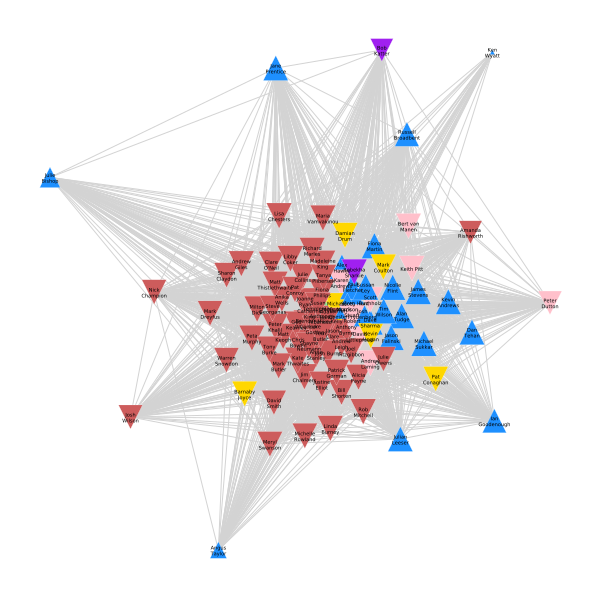

In [20]:
mp_semantic_plot

In [21]:
plot_mp_semantic = tn_mp_semantic.plot(label_term_nodes=True,
                                      label_doc_nodes=True,
                                      vertex_label_size=4,
                                      alpha = 0.05,
                                      vertex_color=['gray' if v['party'] is None 
                                                      else ('dodgerblue' if v['party'] == 'Liberal Party of Australia'
                                                      else ('indianred' if v['party'] == 'Australian Labor Party' 
                                                      else ('lightgreen' if v['party'] == 'Australian Greens' 
                                                      else ('gold' if v['party'] == 'The Nationals' 
                                                      else ('darkorange' if v['party'] == 'Center Alliance' 
                                                      else ('pink' if v['party'] == 'Liberal National Party of Queensland'
                                                      else  'purple'))))))
                                                      for v in tn_mp_semantic.vs],
                                       vertex_shape=['none' if v['party'] is None 
                                                      else 'triangle' if v['party'] == 'Liberal Party of Australia'
                                                      else 'triangle-down'
                                                      for v in tn_mp_semantic.vs])

KeyboardInterrupt: 

In [ ]:
plot_mp_semantic

In [ ]:
print(tn_mp_semantic.degree.sort_values(ascending=False)[:30].to_markdown())